In [1]:
import sys
sys.path.append('/workspaces/Machine_Learning_G19/Library')

from data_prep import PreProcessor1

import library_leo as leo

# FEATURENUMBER = '4'

In [2]:
FEATURENUMBER = '4'
random_state = 42


In [3]:
# supppress warnings
import warnings
warnings.filterwarnings("ignore")
# install libraries
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from math import log

In [4]:
# get the data
train_path = "../Data/train_data.csv"
test_path = "../Data/test_data.csv"
# Replace 'Column29' with the actual column name that has mixed types
dtype = {'Column29': 'str'}

train = pd.read_csv(train_path, index_col='Claim Identifier',
                    dtype=dtype, low_memory=False)
test = pd.read_csv(test_path, index_col='Claim Identifier',
                   dtype=dtype, low_memory=False)

In [5]:
# get the data
train_path = "../Data/train_data.csv"
test_path = "../Data/test_data.csv"
# Replace 'Column29' with the actual column name that has mixed types
dtype = {'Column29': 'str'}

train = pd.read_csv(train_path, index_col='Claim Identifier',
                    dtype=dtype, low_memory=False)
test = pd.read_csv(test_path, index_col='Claim Identifier',
                   dtype=dtype, low_memory=False)

## generate majority target


In [6]:
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
y_str = y.str[:1]

In [7]:
y.value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [8]:
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(y_str.values.reshape(-1,1))
y_hot = encoder.transform(y_str.values.reshape(-1,1)).toarray()
y_hot = pd.DataFrame(y_hot, columns=encoder.get_feature_names_out(['Claim Injury Type']), index = y_str.index)
y_hot.info()


<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Claim Injury Type_1  574026 non-null  float64
 1   Claim Injury Type_2  574026 non-null  float64
 2   Claim Injury Type_3  574026 non-null  float64
 3   Claim Injury Type_4  574026 non-null  float64
 4   Claim Injury Type_5  574026 non-null  float64
 5   Claim Injury Type_6  574026 non-null  float64
 6   Claim Injury Type_7  574026 non-null  float64
 7   Claim Injury Type_8  574026 non-null  float64
dtypes: float64(8)
memory usage: 39.4 MB


In [9]:
y_str.value_counts()

Claim Injury Type
2    291078
4    148507
3     68906
5     48280
1     12477
6      4211
8       470
7        97
Name: count, dtype: int64

In [10]:
y_int = y_str.astype(int)
X = train.drop(columns=['Claim Injury Type'])
# partition the data X, y and y_2bin
X_train, X_valid, y_hot_train,y_hot_valid = train_test_split(
    X, y_hot, test_size=0.2, random_state=0)

In [11]:
pr = PreProcessor1()
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_train)
print("------------pipeline---------------------")
df_train = pr.cast_pipeline(X_train)
print("df after cast_pipeline:", df_train.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_train)   
df_train = pr.fillna_pipeline(df_train)
print("df after fillna_pipeline:", df_train.shape)
print("------------transformation---------------------")
pr.set_transformations(df_train)
df_train = pr.transformation_pipeline(df_train)
print("df after transformation_pipeline:", df_train.shape)
df_train= pr.scaling_pipeline(df_train)
df_train = df_train.drop(columns=['Agreement Reached', 'WCB Decision'])
df_train.info() 

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (459220, 26)
------------fillna---------------------
extended fillna_list: [('Age at Injury', 'median'), ('Average Weekly Wage', 'median'), ('Birth Year', 'median'), ('IME-4 Count', 'median'), ('Industry Code', 'median'), ('WCIO Cause of Injury Code', 'median'), ('WCIO Nature of Injury Code', 'median'), ('WCIO Part Of Body Code', 'median'), ('Zip Code', 'median'), ('Agreement Reached', 'median'), ('Number of Dependents', 'median'), ('Accident Date', 'mode'), ('Alternative Dispute Resolution', 'mode'), ('Assembly Date', 'mode'), ('Attorney/Representative', 'mode'), ('C-2 Date', 'mode'), ('C-3 Date', 'mode'), ('Carrier Name', '

In [12]:
pr.update_status('valid')
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_valid)
print("------------pipeline---------------------")
df_valid = pr.cast_pipeline(X_valid)
print("df after cast_pipeline:", df_valid.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_valid)   
df_valid = pr.fillna_pipeline(df_valid)
print("df after fillna_pipeline:", df_valid.shape)
print("------------transformation---------------------")
pr.set_transformations(df_valid)
df_valid = pr.transformation_pipeline(df_valid)
print("df after transformation_pipeline:", df_valid.shape)
df_valid = pr.scaling_pipeline(df_valid)
df_valid = df_valid.drop(columns=['Agreement Reached', 'WCB Decision'])

df_valid.info()

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
"['Industry Code Description'] not found in axis"
-Column Industry Code Description not found
"['OIICS Nature of Injury Description'] not found in axis"
-Column OIICS Nature of Injury Description not found
"['WCIO Cause of Injury Description'] not found in axis"
-Column WCIO Cause of Injury Description not found
"['WCIO Nature of Injury Description'] not found in axis"
-Column WCIO Nature of Injury Description not found
"['WCIO Part Of Body Description'] not found in axis"
-Column WCIO Part Of Body Description not found
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (114806, 26)
------------fillna----

In [13]:
"""pr.update_status('test')
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(test)
print("------------pipeline---------------------")
df_test = pr.cast_pipeline(test)
print("df after cast_pipeline:", df_test.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_test)   
df_test = pr.fillna_pipeline(df_test)
print("df after fillna_pipeline:", df_test.shape)
print("------------transformation---------------------")
pr.set_transformations(df_test)
df_test = pr.transformation_pipeline(df_test)
print("df after transformation_pipeline:", df_test.shape)
df_test = pr.scaling_pipeline(df_test)
#drop the columns 'Agreement Reached', 'WCB Decision'
df_valid = df_valid.drop(columns=['Agreement Reached', 'WCB Decision'])
df_test.info()"""

'pr.update_status(\'test\')\nprint("------------updates---------------------")\npr.update_casted_cols()\nprint("------------set_casting---------------------")\npr.set_castings(test)\nprint("------------pipeline---------------------")\ndf_test = pr.cast_pipeline(test)\nprint("df after cast_pipeline:", df_test.shape)\nprint("------------fillna---------------------")\npr.update_fillna_list(df_test)   \ndf_test = pr.fillna_pipeline(df_test)\nprint("df after fillna_pipeline:", df_test.shape)\nprint("------------transformation---------------------")\npr.set_transformations(df_test)\ndf_test = pr.transformation_pipeline(df_test)\nprint("df after transformation_pipeline:", df_test.shape)\ndf_test = pr.scaling_pipeline(df_test)\n#drop the columns \'Agreement Reached\', \'WCB Decision\'\ndf_valid = df_valid.drop(columns=[\'Agreement Reached\', \'WCB Decision\'])\ndf_test.info()'

# choosing the subset of y to predict

In [14]:
import itertools

# Get all column names of y_hot
columns =list(set(y_hot.columns) -set(['Claim Injury Type_2']))


# Generate all possible permutations of y_hot
permutations = []
for r in range(1, 4):
    for combo in itertools.combinations(columns, r):
        permutations.append(combo)

In [15]:
df_train_n = df_train.select_dtypes(include=['int64', 'float64'])

to choose the best partition we can use entropy or gini index
- now I'm doing it with entropy, at some point I'll do it with gini index

In [16]:
# for each permutation, sum the columns
tot_entropy= []
tot_entropy_1 = []
tot_entropy_0 = []
len_tot = len(df_train_n)
columns_list = df_train_n.columns
names_list = []
for perm in permutations:
    print(perm)
    name = ''
    for element in perm:
        name = name + element[-1] + '_'
    names_list.append(name[:-1])

    y_hot_train_perm = y_hot_train[list(perm)].sum(axis=1)
    df_perm_1 = df_train_n[y_hot_train_perm == 1]
    df_perm_0 = df_train_n[y_hot_train_perm == 0]
    tot_entropy_permutation = []
    tot_entropy_permutation_1 = []
    tot_entropy_permutation_0 = []
    len_1 = len(df_perm_1)
    len_0 = len_tot- len_1
    for col in columns_list:
        entropy_1 = leo.entropy(df_perm_1[col])
        entropy_0 = leo.entropy(df_perm_0[col])
        #tot_entropy_permutation.append(entropy_1*(len_1/(len_1+len_0)) + entropy_0*(len_1/(len_1+len_0)))
        tot_entropy_permutation_1.append(entropy_1)
        tot_entropy_permutation_0.append(entropy_0)
        tot_entropy_permutation.append(entropy_1 - entropy_0)
    #print(f"tot_entropy_permutation.shape: {len(tot_entropy_permutation)}")
    #print(f"average: {np.array(tot_entropy_permutation).mean()}  max: {np.array(tot_entropy_permutation).max()}  min: {np.array(tot_entropy_permutation).min()}")
    tot_entropy_permutation = np.array(tot_entropy_permutation)
    tot_entropy_permutation_1 = np.array(tot_entropy_permutation_1)
    tot_entropy_permutation_0 = np.array(tot_entropy_permutation_0)

    
    tot_entropy.append(tot_entropy_permutation.sum())
    tot_entropy_1.append(tot_entropy_permutation_1.sum())
    tot_entropy_0.append(tot_entropy_permutation_0.sum())
    
    
    


('Claim Injury Type_8',)
('Claim Injury Type_1',)
('Claim Injury Type_5',)
('Claim Injury Type_4',)
('Claim Injury Type_3',)
('Claim Injury Type_7',)
('Claim Injury Type_6',)
('Claim Injury Type_8', 'Claim Injury Type_1')
('Claim Injury Type_8', 'Claim Injury Type_5')
('Claim Injury Type_8', 'Claim Injury Type_4')
('Claim Injury Type_8', 'Claim Injury Type_3')
('Claim Injury Type_8', 'Claim Injury Type_7')
('Claim Injury Type_8', 'Claim Injury Type_6')
('Claim Injury Type_1', 'Claim Injury Type_5')
('Claim Injury Type_1', 'Claim Injury Type_4')
('Claim Injury Type_1', 'Claim Injury Type_3')
('Claim Injury Type_1', 'Claim Injury Type_7')
('Claim Injury Type_1', 'Claim Injury Type_6')
('Claim Injury Type_5', 'Claim Injury Type_4')
('Claim Injury Type_5', 'Claim Injury Type_3')
('Claim Injury Type_5', 'Claim Injury Type_7')
('Claim Injury Type_5', 'Claim Injury Type_6')
('Claim Injury Type_4', 'Claim Injury Type_3')
('Claim Injury Type_4', 'Claim Injury Type_7')
('Claim Injury Type_4', 'C

Best partition for 1 elements: ('Claim Injury Type_4',)
Best partition for 2 elements: ('Claim Injury Type_5', 'Claim Injury Type_4')
Best partition for 3 elements: ('Claim Injury Type_5', 'Claim Injury Type_4', 'Claim Injury Type_6')


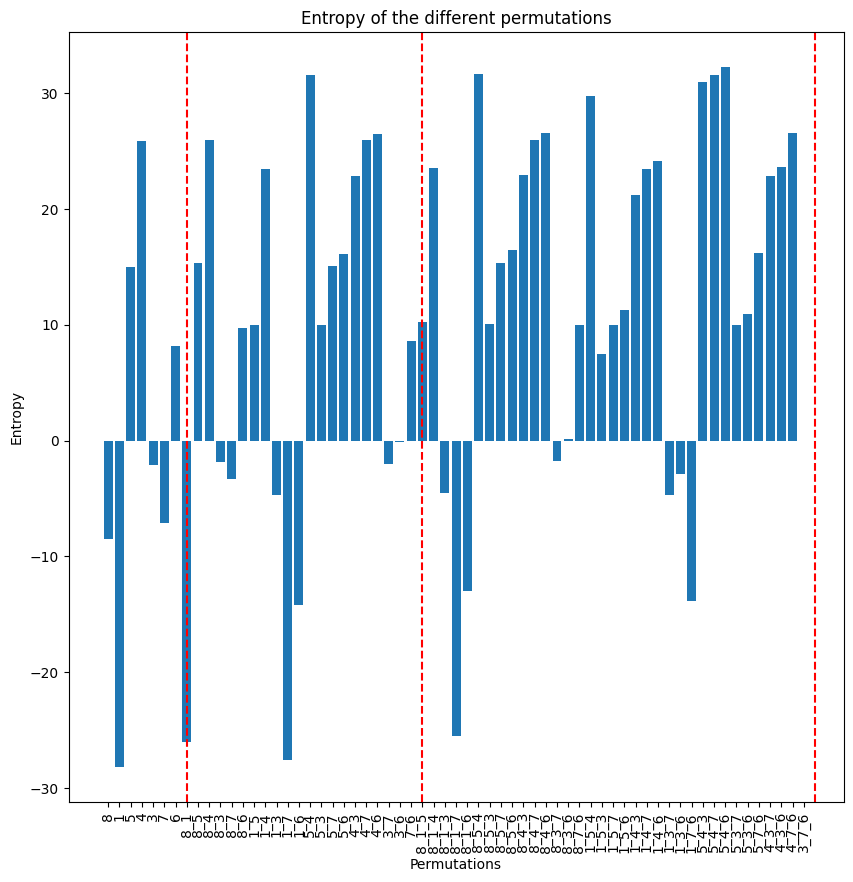

In [17]:
from math import comb

diving_lines = []
div = 0
for i in range(1, 4):
    div1 = comb(7, i) + div
    diving_lines.append(div1)
    max_partion = np.argmax(tot_entropy[div:div1]) + div
    print(f'Best partition for {i} elements: {permutations[max_partion]}')
    div = div1
    
plt.figure(figsize=(10, 10))
plt.bar(names_list, tot_entropy)
plt.xlabel('Permutations')
#rotate x labels
plt.xticks(rotation=90)
plt.ylabel('Entropy')
plt.title('Entropy of the different permutations')
    
for line in diving_lines:
    plt.axvline(x=line, color='r', linestyle='--')




Best partition for 1 elements: 3
Best partition for 2 elements: 11
Best partition for 3 elements: 27


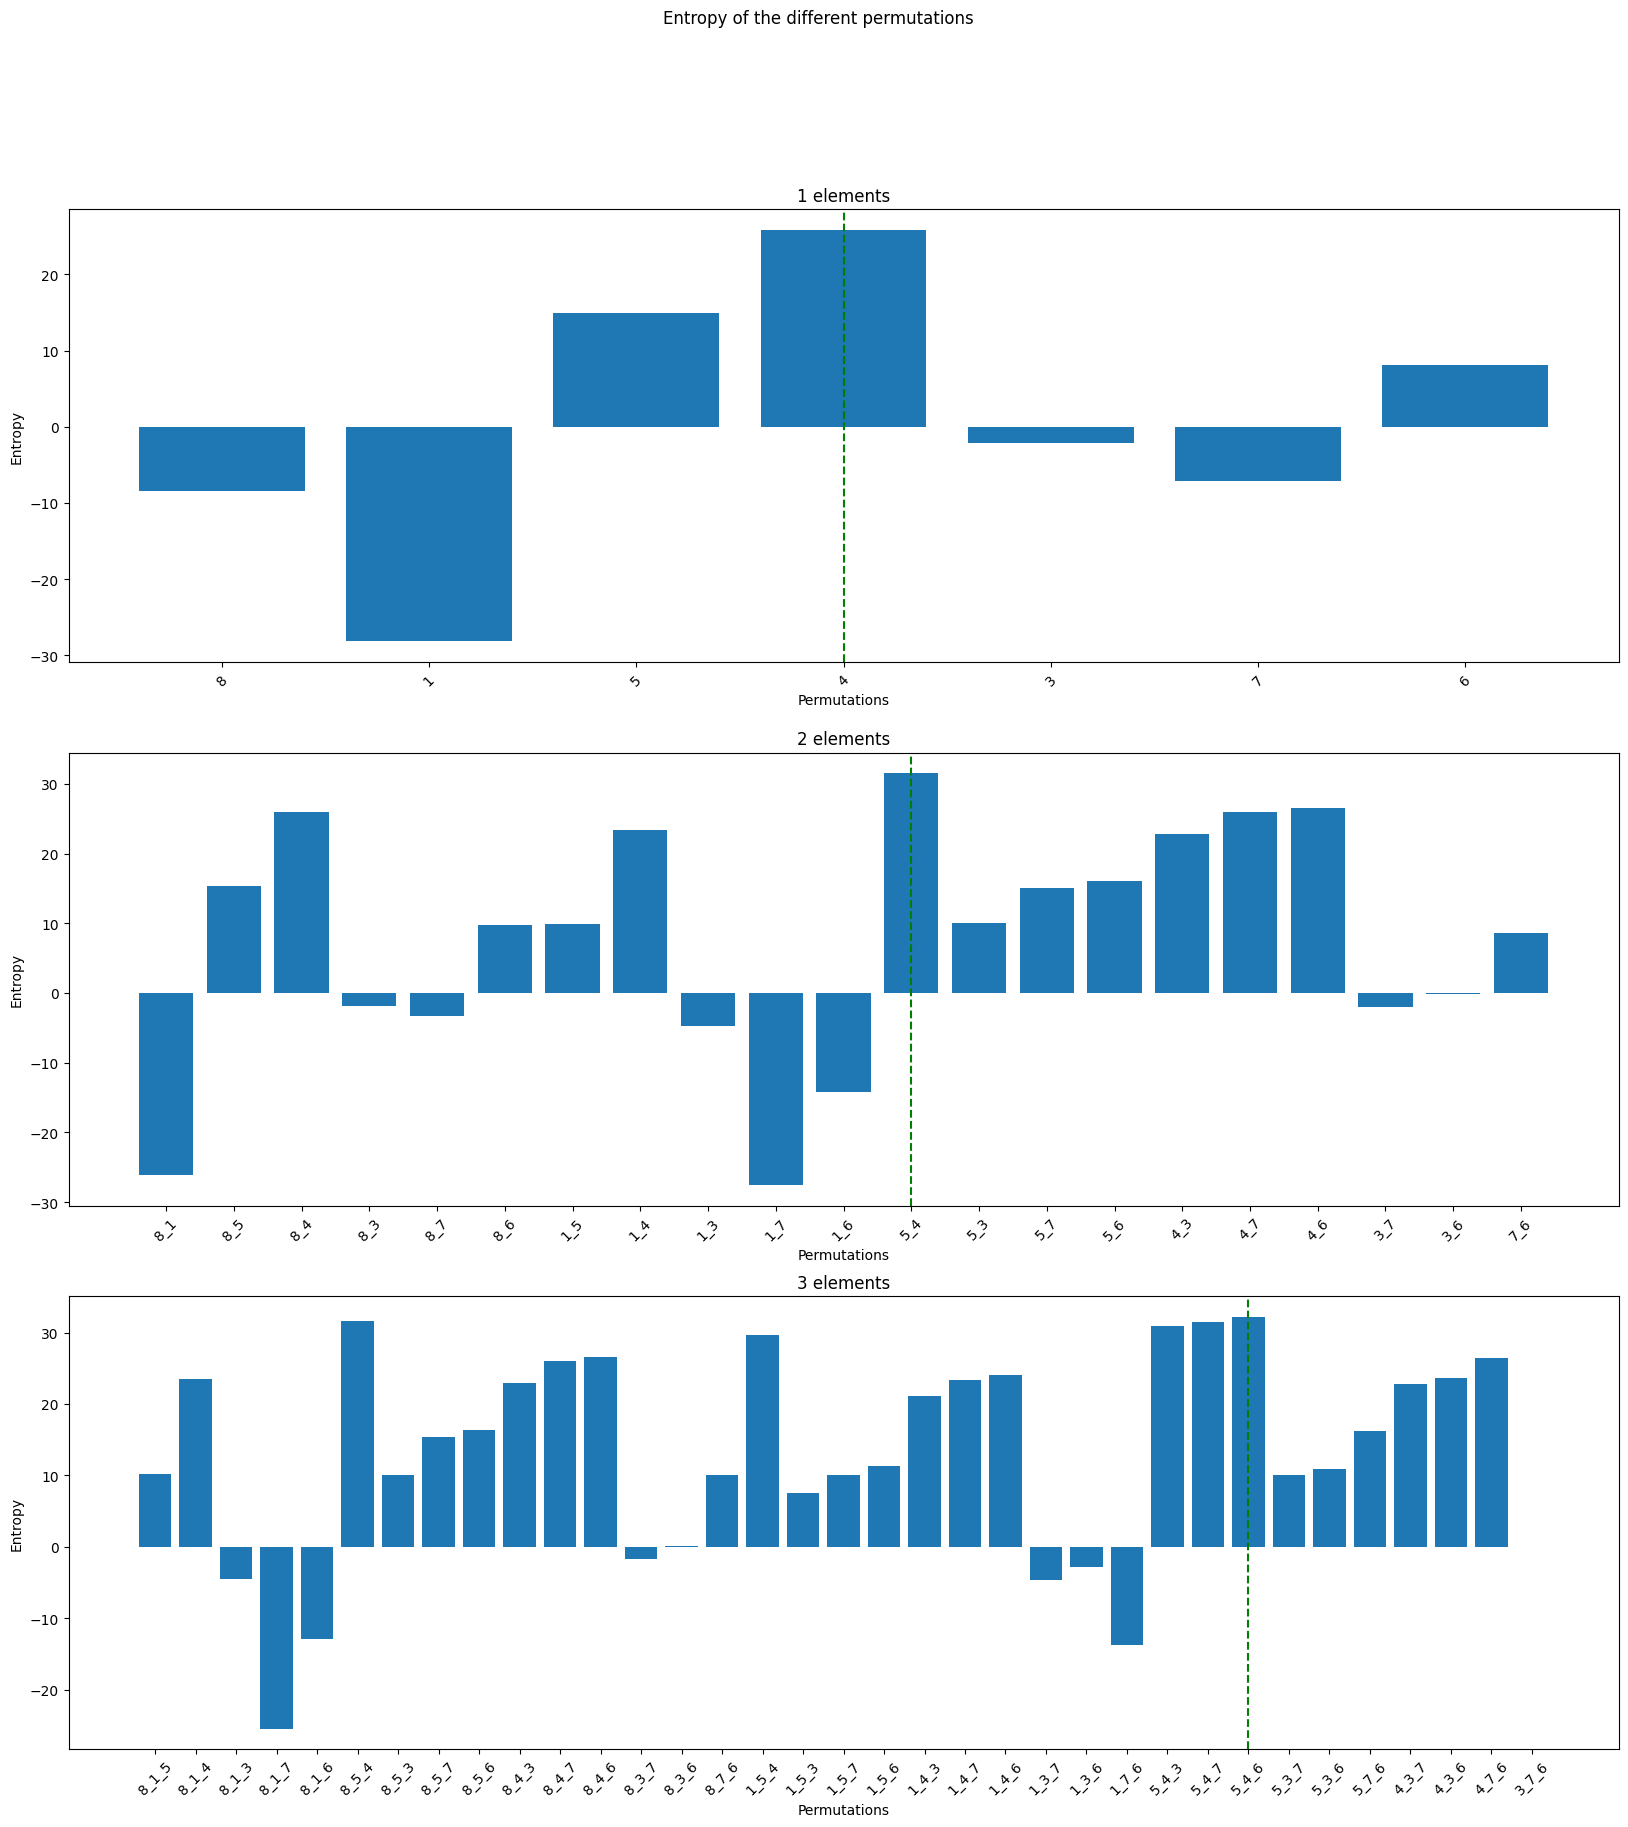

In [18]:
# make 3 suplots
fig, axs = plt.subplots(3, 1, figsize=(20, 20))
fig.suptitle('Entropy of the different permutations')
div= 0
for i in range(3):
    div1 = diving_lines[i]
    axs[i].bar(names_list[div:div1], tot_entropy[div:div1])
    max_partion = np.argmax(tot_entropy[div:div1])
    print(f'Best partition for {i+1} elements: {max_partion}')
    axs[i].axvline(x=max_partion, color='g', linestyle='--')
    axs[i].set_title(f'{i+1} elements')
    axs[i].set_ylabel('Entropy')
    axs[i].set_xlabel('Permutations')
    axs[i].set_xticklabels(names_list[div:div1], rotation=45)
   
    div = div1




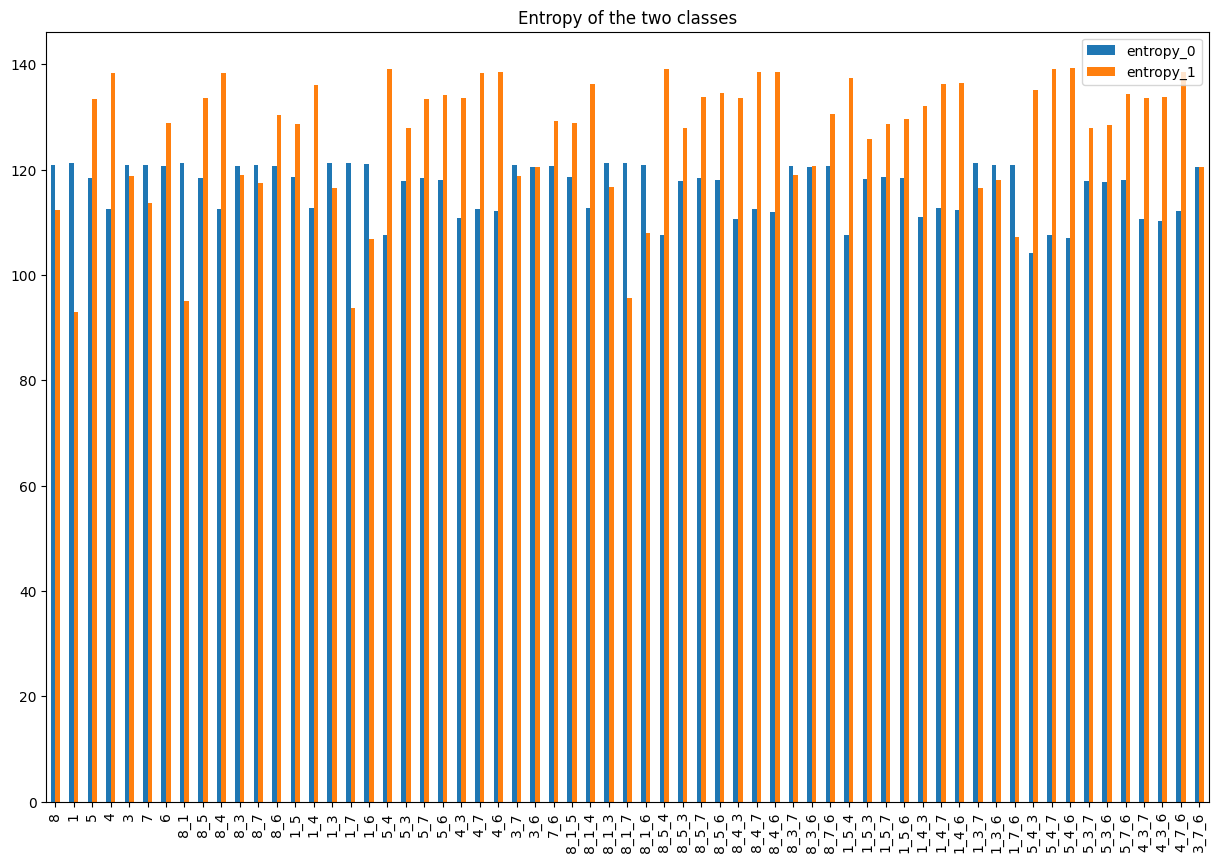

In [19]:
df_s0 = pd.DataFrame(tot_entropy_0, names_list)
df_s1 = pd.DataFrame(tot_entropy_1, names_list)
df_s01 = pd.concat([df_s0, df_s1], axis=1)

df_s01.columns = ['entropy_0', 'entropy_1']

df_s01.plot(kind = 'bar', figsize = (15, 10), title = 'Entropy of the two classes')
plt.show()


# feature selection

## Correlation with target variable

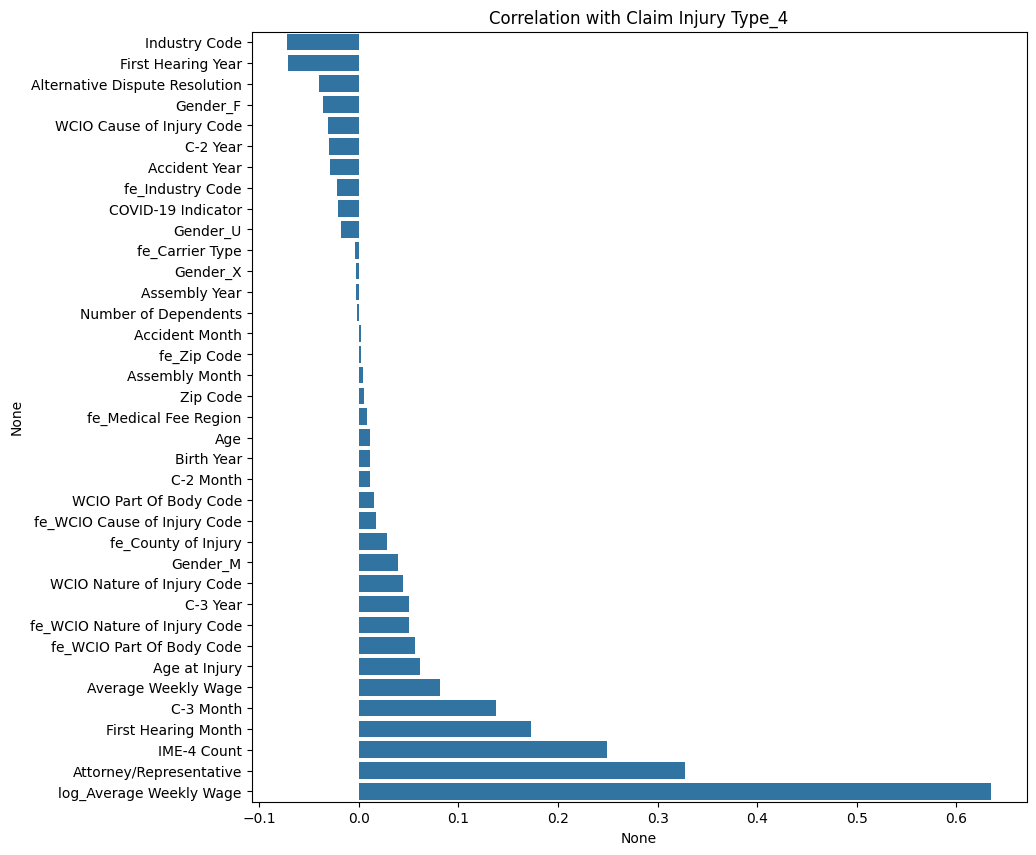

In [20]:
# correlation with target
numcols = df_train.select_dtypes(include=['Int64', 'float64']).columns
corr = df_train[numcols].corrwith(y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
corr = corr.sort_values(ascending=True)

plt.figure(figsize=(10, 10))
sns.barplot(x=corr, y=corr.index)
plt.title(f'Correlation with Claim Injury Type_{FEATURENUMBER}')
plt.show()


In [21]:
# import log
from math import log

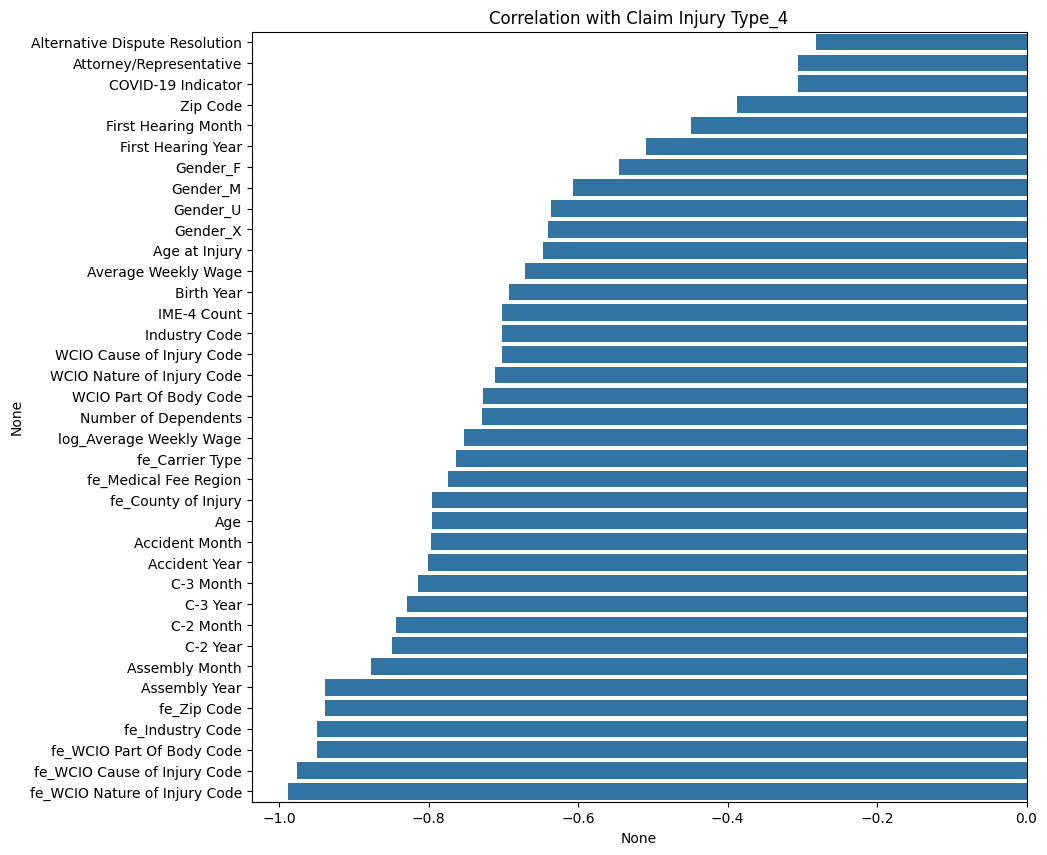

In [22]:
s_corr = []
for col in numcols:
    s_col = leo.two_col_entropy_corr(df_train[col], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
    s_col = log((s_col +1)/2)
    s_corr.append(s_col)
    
s_corr = pd.Series(s_corr, index=numcols).sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=s_corr, y=numcols)
plt.title(f'Correlation with Claim Injury Type_{FEATURENUMBER}')
plt.show()


In [23]:
# removing the columns with low correlation
selected_cols = s_corr[s_corr > -0.8].index

## correation between the selected columns


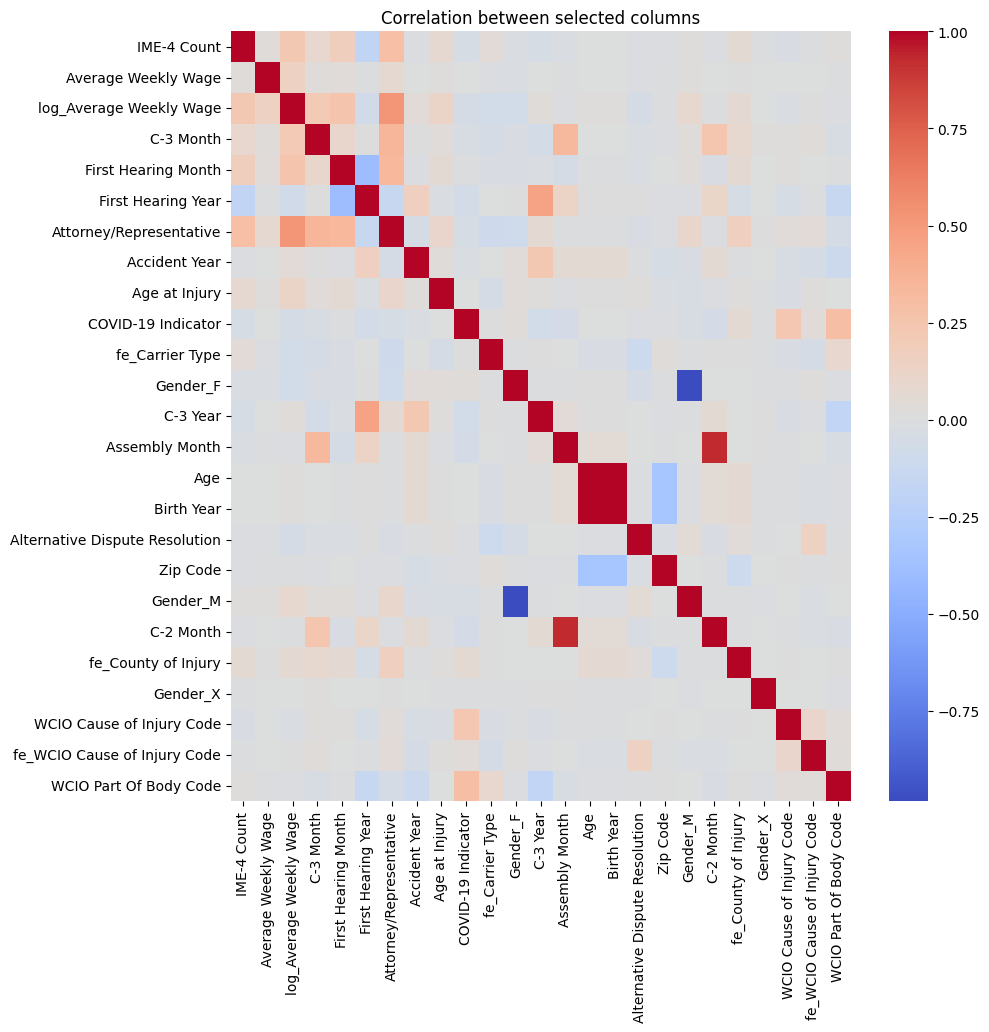

In [24]:
#correation between the selected columns
corr = df_train[selected_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation between selected columns')
plt.show()

## remove the columns with high correlation

In [25]:
# remove the columns with high correlation
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [26]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [27]:
to_drop

['Birth Year', 'Gender_M', 'C-2 Month']

In [28]:
selected_cols = [col for col in selected_cols if col not in to_drop]
len(selected_cols)

22

<Axes: >

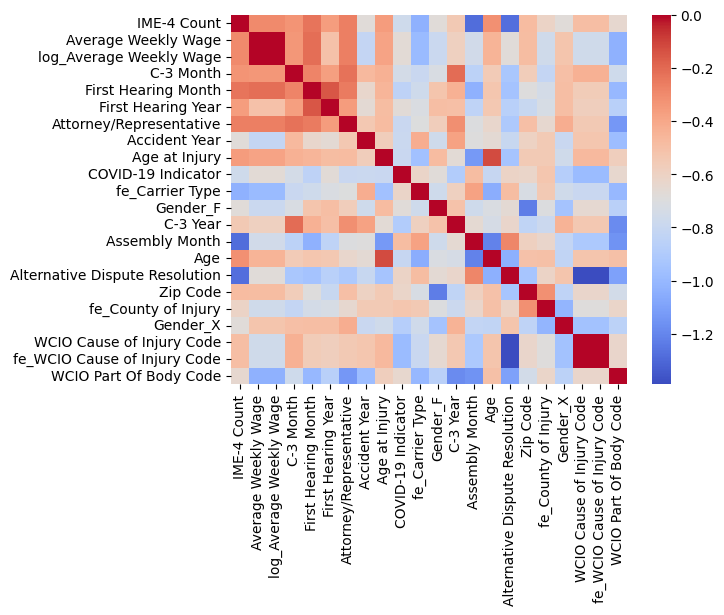

In [29]:
entropy_corr_matrix = leo.entropy_corr(df_train[selected_cols])
sns.heatmap(entropy_corr_matrix, annot=False, cmap='coolwarm')

In [30]:
upper = entropy_corr_matrix.where(np.triu(np.ones(entropy_corr_matrix.shape), k=1).astype(bool))
to_drop_2 = [column for column in upper.columns if any(upper[column] > -0.2)]
to_drop_2

['log_Average Weekly Wage',
 'First Hearing Year',
 'Age',
 'fe_WCIO Cause of Injury Code']

In [31]:
selected_cols_2 = [col for col in selected_cols if col not in to_drop_2]
len(selected_cols_2)

18

In [32]:
selected_cols_2

['IME-4 Count',
 'Average Weekly Wage',
 'C-3 Month',
 'First Hearing Month',
 'Attorney/Representative',
 'Accident Year',
 'Age at Injury',
 'COVID-19 Indicator',
 'fe_Carrier Type',
 'Gender_F',
 'C-3 Year',
 'Assembly Month',
 'Alternative Dispute Resolution',
 'Zip Code',
 'fe_County of Injury',
 'Gender_X',
 'WCIO Cause of Injury Code',
 'WCIO Part Of Body Code']

# model selection

In [33]:

# evaluate the classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model_full = []
model_selected = []
model_selected_2 = []

model_full_cmax = []
model_selected_cmax = []
model_selected_2_cmax = []


## decision tree classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
# create a decision tree classifier
DecisionTreeClassifier_1 = DecisionTreeClassifier(random_state=0)
DecisionTreeClassifier_selected = DecisionTreeClassifier(random_state=0)
DecisionTreeClassifier_selected_2 = DecisionTreeClassifier(random_state=0)
num_cols = [col for col in df_train.columns if df_train[col].dtype in ['Int64', 'int64', 'float64','Float64']]

# train the classifier
DecisionTreeClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
DecisionTreeClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
DecisionTreeClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

y_pred_full = DecisionTreeClassifier_1.predict(df_valid[num_cols])
y_pred_selected = DecisionTreeClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = DecisionTreeClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("DecisionTreeClassifier",accuracy_full, f1_full))
model_selected.append(("DecisionTreeClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("DecisionTreeClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))

leo.report_and_save(DecisionTreeClassifier_1,
                    "model_name",
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=num_cols)


In [35]:
leo.report_and_save(DecisionTreeClassifier_1,
                    f"{FEATURENUMBER}_DecisionTreeClassifier_1",
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=num_cols)

leo.report_and_save(DecisionTreeClassifier_selected,
                    f"{FEATURENUMBER}_DecisionTreeClassifier_selected",
                    y_pred_selected,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols)

leo.report_and_save(DecisionTreeClassifier_selected_2,
                    f"{FEATURENUMBER}_DecisionTreeClassifier_selected_2",
                    y_pred_selected_2,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols_2)

## logistic regression

In [36]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

# create a logistic regression classifier
LogisticRegression_1 = LogisticRegression(random_state=0)
LogisticRegression_selected = LogisticRegression(random_state=0)
LogisticRegression_selected_2 = LogisticRegression(random_state=0)

# train the classifier
LogisticRegression_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
LogisticRegression_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
LogisticRegression_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_1.predict(df_valid[num_cols]))
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected.predict(df_valid[selected_cols]))
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected_2.predict(df_valid[selected_cols_2]))

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_1.predict(df_valid[num_cols]), average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected.predict(df_valid[selected_cols]), average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected_2.predict(df_valid[selected_cols_2]), average='macro')

model_full.append(("LogisticRegression",accuracy_full, f1_full))
model_selected.append(("LogisticRegression",accuracy_selected, f1_selected))
model_selected_2.append(("LogisticRegression",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("LogisticRegression",cm_full.max()))
model_selected_cmax.append(("LogisticRegression",cm_selected.max()))
model_selected_2_cmax.append(("LogisticRegression",cm_selected_2.max()))

In [37]:
leo.report_and_save(DecisionTreeClassifier_1,
                    f"{FEATURENUMBER}_LogisticRegression_1",
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=num_cols)

leo.report_and_save(DecisionTreeClassifier_selected,
                    f"{FEATURENUMBER}_LogisticRegression_selected",
                    y_pred_selected,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols)

leo.report_and_save(DecisionTreeClassifier_selected_2,
                    f"{FEATURENUMBER}_LogisticRegression_selected_2",
                    y_pred_selected_2,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols_2)

## random forest

In [38]:

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
RandomForestClassifier_1 = RandomForestClassifier(random_state=random_state)
RandomForestClassifier_selected = RandomForestClassifier(random_state=random_state)
RandomForestClassifier_selected_2 = RandomForestClassifier(random_state=random_state)

# train the classifier
RandomForestClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
RandomForestClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
RandomForestClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = RandomForestClassifier_1.predict(df_valid[num_cols])
y_pred_selected = RandomForestClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = RandomForestClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("RandomForestClassifier",accuracy_full, f1_full))
model_selected.append(("RandomForestClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("RandomForestClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("RandomForestClassifier",cm_full.max()))
model_selected_cmax.append(("RandomForestClassifier",cm_selected.max()))
model_selected_2_cmax.append(("RandomForestClassifier",cm_selected_2.max()))


In [39]:
leo.report_and_save(DecisionTreeClassifier_1,
                    f"{FEATURENUMBER}_DecisionTreeClassifier_1",
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=num_cols)

leo.report_and_save(DecisionTreeClassifier_selected,
                    f"{FEATURENUMBER}_DecisionTreeClassifier_selected",
                    y_pred_selected,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols)

leo.report_and_save(DecisionTreeClassifier_selected_2,
                    f"{FEATURENUMBER}_DecisionTreeClassifier_selected_2",
                    y_pred_selected_2,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols_2)

## XGBoost

In [40]:
#! pip install xgboost

In [41]:
# import xgboost classifier
from xgboost import XGBClassifier

# create a xgboost classifier
XGBClassifier_1 = XGBClassifier(random_state=random_state)
XGBClassifier_selected = XGBClassifier(random_state=random_state)
XGBClassifier_selected_2 = XGBClassifier(random_state=random_state)

# train the classifier
XGBClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
XGBClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
XGBClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = XGBClassifier_1.predict(df_valid[num_cols])
y_pred_selected = XGBClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = XGBClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)
f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("XGBClassifier",accuracy_full, f1_full))
model_selected.append(("XGBClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("XGBClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("XGBClassifier",cm_full.max()))
model_selected_cmax.append(("XGBClassifier",cm_selected.max()))
model_selected_2_cmax.append(("XGBClassifier",cm_selected_2.max()))


In [42]:
leo.report_and_save(XGBClassifier_1,
                    f"{FEATURENUMBER}_XGBClassifier_1",
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=num_cols)

leo.report_and_save(XGBClassifier_selected,
                    f"{FEATURENUMBER}_XGBClassifier_selected",
                    y_pred_selected,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols)

leo.report_and_save(XGBClassifier_selected_2,
                    f"{FEATURENUMBER}_XGBClassifier_selected_2",
                    y_pred_selected_2,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols_2)

## LightGBM

In [43]:
#! pip install lightgbm

In [44]:
# import lightgbm classifier
from lightgbm import LGBMClassifier
 
# create a lightgbm classifier
LGBMClassifier_1 = LGBMClassifier(random_state=random_state)
LGBMClassifier_selected = LGBMClassifier(random_state=random_state)
LGBMClassifier_selected_2 = LGBMClassifier(random_state=random_state)

# train the classifier
LGBMClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
LGBMClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
LGBMClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = LGBMClassifier_1.predict(df_valid[num_cols])
y_pred_selected = LGBMClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = LGBMClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)
f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("LGBMClassifier",accuracy_full, f1_full))
model_selected.append(("LGBMClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("LGBMClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("LGBMClassifier",cm_full.max()))
model_selected_cmax.append(("LGBMClassifier",cm_selected.max()))
model_selected_2_cmax.append(("LGBMClassifier",cm_selected_2.max()))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 118685, number of negative: 340535
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 459220, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258449 -> initscore=-1.054045
[LightGBM] [Info] Start training from score -1.054045
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 118685, number of negative: 340535
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `fo

In [45]:
leo.report_and_save(DecisionTreeClassifier_1,
                    f"{FEATURENUMBER}_LGBMClassifier_1",
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=num_cols)

leo.report_and_save(DecisionTreeClassifier_selected,
                    f"{FEATURENUMBER}_LGBMClassifier_selected",
                    y_pred_selected,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols)

leo.report_and_save(DecisionTreeClassifier_selected_2,
                    f"{FEATURENUMBER}_LGBMClassifier_selected_2",
                    y_pred_selected_2,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols_2)

In [46]:
for name, accuracy, f1 in model_full:
    print(f'{name}: accuracy={accuracy}, f1={f1}')


DecisionTreeClassifier: accuracy=0.6857307109384527, f1=0.6291425989892796
LogisticRegression: accuracy=0.7874588436144453, f1=0.7103010502675482
RandomForestClassifier: accuracy=0.8672281936484156, f1=0.8317978615372794
XGBClassifier: accuracy=0.8431353761998501, f1=0.7794247210335957
LGBMClassifier: accuracy=0.8762608226050903, f1=0.842821104933644


## multilayer perceptron


In [47]:
# multilayer perceptron
from sklearn.neural_network import MLPClassifier

# create a multilayer perceptron classifier
MLPClassifier_1 = MLPClassifier(random_state=random_state)
MLPClassifier_selected = MLPClassifier(random_state=random_state)
MLPClassifier_selected_2 = MLPClassifier(random_state=random_state)

# train the classifier
MLPClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
MLPClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
MLPClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = MLPClassifier_1.predict(df_valid[num_cols])
y_pred_selected = MLPClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = MLPClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("MLPClassifier",accuracy_full, f1_full))
model_selected.append(("MLPClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("MLPClassifier",accuracy_selected_2, f1_selected_2))

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='true')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='true')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='true')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))


In [48]:
leo.report_and_save(MLPClassifier_1,
                    f"{FEATURENUMBER}_MLPClassifier_1",
                    y_pred_full,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=num_cols)

leo.report_and_save(MLPClassifier_selected,
                    f"{FEATURENUMBER}_MLPClassifier_selected",
                    y_pred_selected,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols)

leo.report_and_save(MLPClassifier_selected_2,
                    f"{FEATURENUMBER}_MLPClassifier_selected_2",
                    y_pred_selected_2,
                    y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols_2)

## svm classifier (commented out)

In [49]:
"""# svm classifier
from sklearn.svm import SVC

# create a svm classifier
SVC_1 = SVC(random_state=random_state)
SVC_selected = SVC(random_state=random_state)
SVC_selected_2 = SVC(random_state=random_state)

# train the classifier
SVC_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
SVC_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
SVC_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = SVC_1.predict(df_valid[num_cols])
y_pred_selected = SVC_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = SVC_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("SVC",accuracy_full, f1_full))
model_selected.append(("SVC",accuracy_selected, f1_selected))
model_selected_2.append(("SVC",accuracy_selected_2, f1_selected_2))

"""

'# svm classifier\nfrom sklearn.svm import SVC\n\n# create a svm classifier\nSVC_1 = SVC(random_state=random_state)\nSVC_selected = SVC(random_state=random_state)\nSVC_selected_2 = SVC(random_state=random_state)\n\n# train the classifier\nSVC_1.fit(df_train[num_cols], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\nSVC_selected.fit(df_train[selected_cols], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\nSVC_selected_2.fit(df_train[selected_cols_2], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\n\n# evaluate the classifier\ny_pred_full = SVC_1.predict(df_valid[num_cols])\ny_pred_selected = SVC_selected.predict(df_valid[selected_cols])\ny_pred_selected_2 = SVC_selected_2.predict(df_valid[selected_cols_2])\n\naccuracy_full  = accuracy_score(y_hot_valid[f\'Claim Injury Type_{FEATURENUMBER}\'], y_pred_full)\naccuracy_selected = accuracy_score(y_hot_valid[f\'Claim Injury Type_{FEATURENUMBER}\'], y_pred_selected)\naccuracy_selected_2 = accuracy_score(y_hot_valid[f\'Claim In

## voting classifier (commented out)

In [50]:
"""# import the voting classifier
from sklearn.ensemble import VotingClassifier

# create a voting classifier
VotingClassifier_1 = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier_1),
                                                  ('LogisticRegression', LogisticRegression_1),
                                                  ('RandomForestClassifier', RandomForestClassifier_1),
                                                  ('XGBClassifier', XGBClassifier_1),
                                                  ('LGBMClassifier', LGBMClassifier_1),
                                                  ('MLPClassifier', MLPClassifier_1)], voting='soft')
                                                  #('SVC', SVC_1)], voting='soft')


VotingClassifier_selected = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier_selected),
                                                         ('LogisticRegression', LogisticRegression_selected),
                                                         ('RandomForestClassifier', RandomForestClassifier_selected),
                                                         ('XGBClassifier', XGBClassifier_selected),
                                                         ('LGBMClassifier', LGBMClassifier_selected),
                                                         ('MLPClassifier', MLPClassifier_selected)], voting='soft')
                                                         #('SVC', SVC_selected)], voting='soft')

VotingClassifier_selected_2 = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier_selected_2),
                                                           ('LogisticRegression', LogisticRegression_selected_2),
                                                           ('RandomForestClassifier', RandomForestClassifier_selected_2),
                                                           ('XGBClassifier', XGBClassifier_selected_2),
                                                           ('LGBMClassifier', LGBMClassifier_selected_2),
                                                           ('MLPClassifier', MLPClassifier_selected_2)], voting='soft')
                                                           #('SVC', SVC_selected_2)], voting='soft')



# train the classifier
VotingClassifier_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
VotingClassifier_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
VotingClassifier_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = VotingClassifier_1.predict(df_valid[num_cols])
y_pred_selected = VotingClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = VotingClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

cm_full = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, normalize='false')
cm_selected = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, normalize='false')
cm_selected_2 = confusion_matrix(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, normalize='false')

model_full_cmax.append(("DecisionTreeClassifier",cm_full.max()))
model_selected_cmax.append(("DecisionTreeClassifier",cm_selected.max()))
model_selected_2_cmax.append(("DecisionTreeClassifier",cm_selected_2.max()))

model_full.append(("VotingClassifier",accuracy_full, f1_full))
model_selected.append(("VotingClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("VotingClassifier",accuracy_selected_2, f1_selected_2))

"""

'# import the voting classifier\nfrom sklearn.ensemble import VotingClassifier\n\n# create a voting classifier\nVotingClassifier_1 = VotingClassifier(estimators=[(\'DecisionTreeClassifier\', DecisionTreeClassifier_1),\n                                                  (\'LogisticRegression\', LogisticRegression_1),\n                                                  (\'RandomForestClassifier\', RandomForestClassifier_1),\n                                                  (\'XGBClassifier\', XGBClassifier_1),\n                                                  (\'LGBMClassifier\', LGBMClassifier_1),\n                                                  (\'MLPClassifier\', MLPClassifier_1)], voting=\'soft\')\n                                                  #(\'SVC\', SVC_1)], voting=\'soft\')\n\n\nVotingClassifier_selected = VotingClassifier(estimators=[(\'DecisionTreeClassifier\', DecisionTreeClassifier_selected),\n                                                         (\'LogisticRegress

# plotting the results

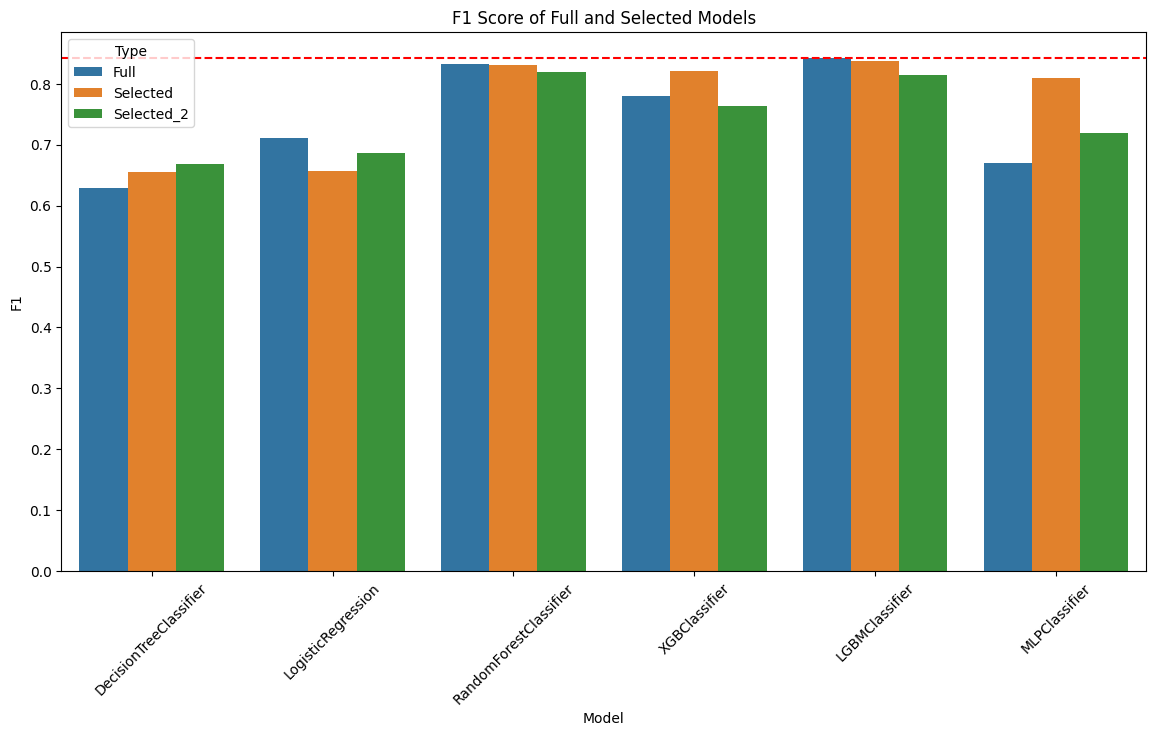

In [51]:
model_full = pd.DataFrame(model_full, columns=['Model', 'Accuracy', 'F1'])
model_selected = pd.DataFrame(model_selected, columns=['Model', 'Accuracy', 'F1'])
model_selected_2 = pd.DataFrame(model_selected_2, columns=['Model', 'Accuracy', 'F1'])

import seaborn as sns

import matplotlib.pyplot as plt

# Combine the dataframes for full and selected models
model_full['Type'] = 'Full'
model_selected['Type'] = 'Selected'
model_selected_2['Type'] = 'Selected_2' 
combined_df = pd.concat([model_full, model_selected])
combined_df = pd.concat([combined_df, model_selected_2])

model_full



# Plot the F1 score
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='F1', hue='Type', data=combined_df)
plt.title('F1 Score of Full and Selected Models')
plt.axhline(combined_df['F1'].max(), color='red', linestyle='--')
plt.xticks(rotation=45)
plt.show()

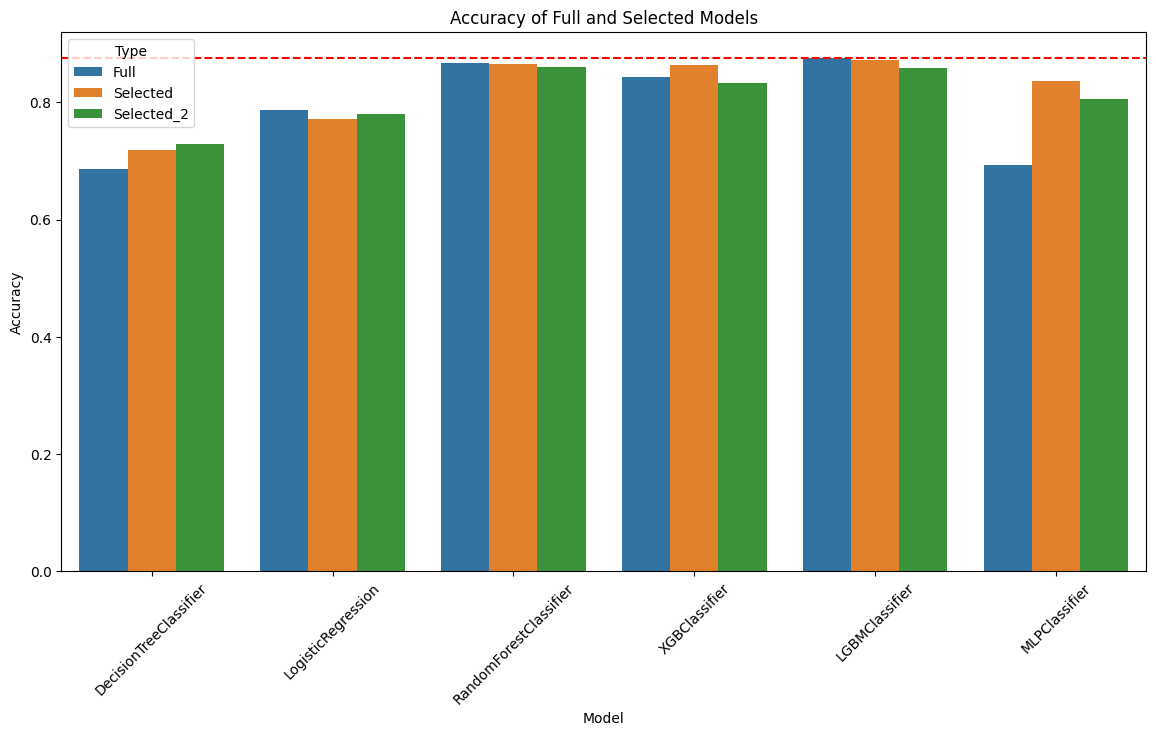

<Axes: xlabel='Model', ylabel='value'>

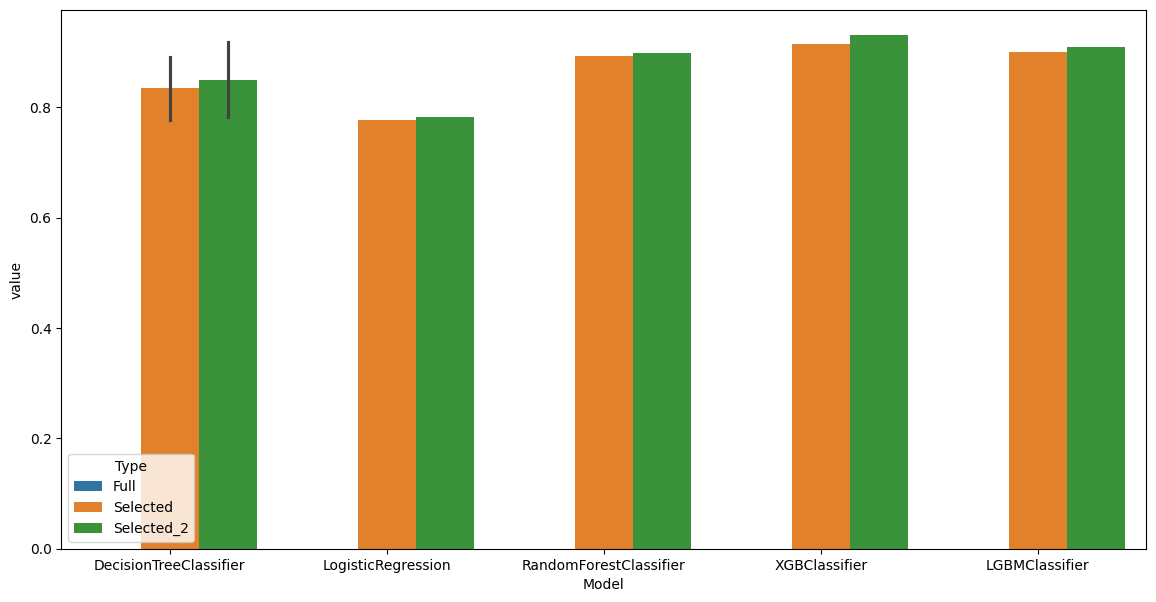

In [52]:
# plotting the results
model_full_df = pd.DataFrame(model_full, columns=['Model', 'Accuracy', 'F1_full'])
model_selected_df = pd.DataFrame(model_selected, columns=['Model', 'Accuracy', 'F1_selected'])
model_selected_2_df = pd.DataFrame(model_selected_2, columns=['Model', 'Accuracy', 'F1_selected_2'])

model_full_df['Type'] = 'Full'
model_selected_df['Type'] = 'Selected'
model_selected_2_df['Type'] = 'Selected_2'

model_full_cmax_df = pd.DataFrame(model_full_cmax, columns=['Model', 'Cmaxl'])
model_selected_cmax_df = pd.DataFrame(model_selected_cmax, columns=['Model', 'Cmax'])
model_selected_2_cmax_df = pd.DataFrame(model_selected_2_cmax, columns=['Model', 'Cmax'])

model_full_cmax_df['Type'] = 'Full'
model_selected_cmax_df['Type'] = 'Selected'
model_selected_2_cmax_df['Type'] = 'Selected_2'



concatenated_df = pd.concat([model_full_df, model_selected_df, model_selected_2_df], axis=0)
concatenated_cmax_df = pd.concat([model_full_cmax_df, model_selected_cmax_df, model_selected_2_cmax_df], axis=0)

# Plot the accuracy
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Accuracy', hue='Type', data=concatenated_df)
plt.title('Accuracy of Full and Selected Models')
# horizontal line at maximum accuracy
plt.axhline(combined_df['Accuracy'].max(), color='red', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# Melt the concatenated_cmax_df to have a single 'Cmax' column
concatenated_cmax_df = concatenated_cmax_df.melt(id_vars=['Model', 'Type'], value_vars=['Cmax'])

# Plot the Cmax
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='value', hue='Type', data=concatenated_cmax_df)







In [53]:
concatenated_cmax_df

,Model,Type,variable,value
0,DecisionTreeClassifier,Full,Cmax,NaN
1,LogisticRegression,Full,Cmax,NaN
2,RandomForestClassifier,Full,Cmax,NaN
3,XGBClassifier,Full,Cmax,NaN
4,LGBMClassifier,Full,Cmax,NaN
5,DecisionTreeClassifier,Full,Cmax,NaN
6,DecisionTreeClassifier,Selected,Cmax,0.777135
7,LogisticRegression,Selected,Cmax,0.777135
8,RandomForestClassifier,Selected,Cmax,0.892497
9,XGBClassifier,Selected,Cmax,0.913831


# RFE

In [ ]:
# rfe feature selection
from sklearn.feature_selection import RFE

# create a decision tree classifier
DecisionTreeClassifier_final = DecisionTreeClassifier(random_state=42)

# create the RFE model and select 6 attributes
rfe = RFE(estimator=DecisionTreeClassifier_final, n_features_to_select=6)
rfe = rfe.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print(df_train[num_cols].columns)

selected_cols = df_train[num_cols].columns[rfe.support_]
selected_cols

# selected_cols = ['Zip Code', 'Age at Injury', 'Average Weekly Wage', 'Birth Year','WCIO Cause of Injury Code', 'fe_Zip Code']

[False False False  True False False False False False False  True  True
  True False False  True False False False False False False False False
 False False False False False False False False  True False False False
 False]
[31  7 29  1 10 22 28 26 30 32  1  1  1 13  4  1  8  2 12  5 21 24  6 17
 11 14 16 25  3 23 20 27  1  9 15 19 18]
Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'COVID-19 Indicator', 'Zip Code', 'First Hearing Month',
       'First Hearing Year', 'Gender_F', 'Gender_M', 'Gender_U', 'Gender_X',
       'Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
       'Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents', 'log_Average Weekly Wage', 'fe_Carrier Type',
       'fe_Medical Fee Region', 'fe_County of Injury', 'Age', 'Accident Month',
       'Accident Year', 'C-3 Month', 'C-3 Year', 'C-2 Month', 'C-2 Year',
       'Assembly Month', 'A

Index(['Zip Code', 'Age at Injury', 'Average Weekly Wage', 'Birth Year',
       'WCIO Cause of Injury Code', 'fe_Zip Code'],
      dtype='object')

# Grid search for hyperparameter tuning

In [34]:
# grid search for hyperparameters tuning
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


selected_cols = ['Zip Code', 'Age at Injury', 'Average Weekly Wage', 'Birth Year','WCIO Cause of Injury Code', 'fe_Zip Code']

# create a decision tree classifier
DecisionTreeClassifier_final = DecisionTreeClassifier(random_state=42)

# create a dictionary of all values we want to test for n_estimators

param_grid = {'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2', None]}

# use gridsearch to test all values for n_estimators
DecisionTreeClassifier_gscv = GridSearchCV(DecisionTreeClassifier_final, param_grid, cv=5, n_jobs=-1)
# fit model to data
DecisionTreeClassifier_gscv.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# check top performing n_estimators
DecisionTreeClassifier_gscv.best_params_

# create a decision tree classifier
DecisionTreeClassifier_final = DecisionTreeClassifier(random_state=42, **DecisionTreeClassifier_gscv.best_params_)

# train the classifier
DecisionTreeClassifier_final.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_final = DecisionTreeClassifier_final.predict(df_valid[selected_cols])

leo.report_and_save(DecisionTreeClassifier_final,
                    f"{FEATURENUMBER}_DecisionTreeClassifier_final",
                    y_pred_final,y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=False,
                    feaure_list=selected_cols)

Accuracy: 0.8451735971987526
Precision: 0.8624784590984906
Recall: 0.8451735971987526


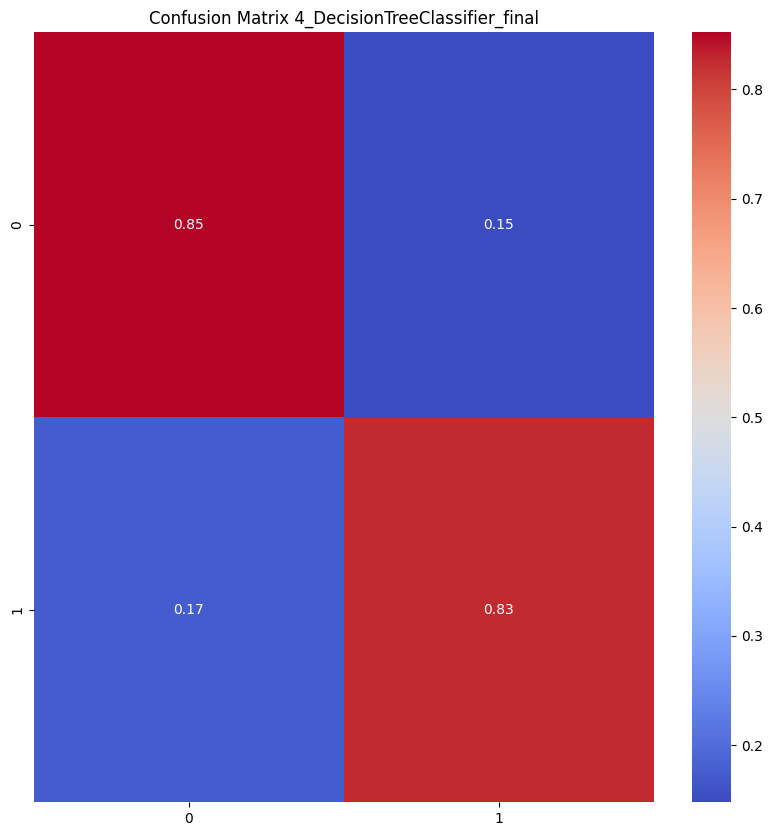

In [35]:
leo.report_and_save(DecisionTreeClassifier_final,
                    f"{FEATURENUMBER}_DecisionTreeClassifier_final",
                    y_pred_final,y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'],
                    model_filepath='../Models',
                    report_filepath='../Reports',
                    print_report=True,
                    feaure_list=selected_cols)

# 